In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [48]:
#Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
#For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. 
#Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. 
#Wavelet Transform tool were used to extract features from images.



In [49]:
# In this dataset 5 factors were observed: 
# 1) Variance: in pixel intensity compared to standard bank note
# 2) Skew: Assymetry in pixel distribution
# 3) Curtosis: Tailedness in distribution
# 4) Entropy: Randomness/complexity of pixel intensity
# 5) Class: Whether it was fake(0) or authentic(1)

In [50]:
data = pd.read_csv('bank_note_data.csv')

data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


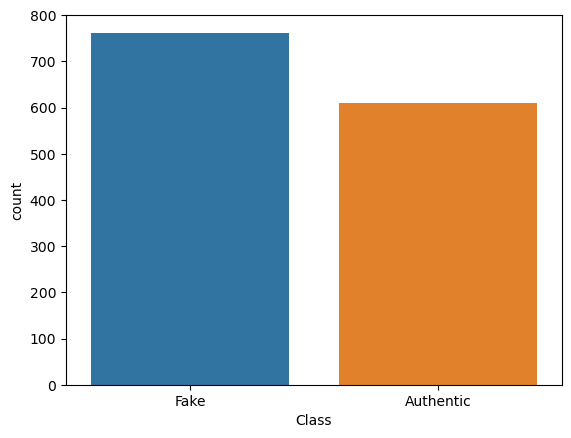

In [51]:
sns.countplot(x='Class', data=data)
plt.xticks(ticks=[0, 1], labels=['Fake', 'Authentic'])
plt.show()


In [52]:
#Scales values for comparison

In [53]:
scaler = StandardScaler()
scaler.fit(data.drop('Class',axis=1))
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [54]:
#Separate data into training and testing samples

In [55]:
X = df_feat
y = data['Class']

In [69]:
#Create a neural network model with the Keras API using a ReLU activation function for the hidden layers and a softmax for the output layer

#Use a neural network because these visual patterns are non-linear and a neural network can help uncover these relationships

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model
model = Sequential([
    Dense(10, activation='relu', input_shape=(len(feat_cols),)),  
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification, change to 2 units for 2 classes
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if y is one-hot encoded
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6692 - loss: 0.6548 - val_accuracy: 0.8495 - val_loss: 0.5765
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.5409 - val_accuracy: 0.8738 - val_loss: 0.4401
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.3928 - val_accuracy: 0.9005 - val_loss: 0.3134
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.2539 - val_accuracy: 0.9442 - val_loss: 0.2170
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9611 - loss: 0.1881 - val_accuracy: 0.9830 - val_loss: 0.1468
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.1158 - val_accuracy: 0.9903 - val_loss: 0.0991
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0754 - val_accuracy: 0.9951 - val_loss: 0.0690
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0562 - val_accuracy: 0.9951 - val_loss:

In [68]:
#Model clearly improves in accuracy as it passes through the dataset

In [59]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.9989 - loss: 0.0319
Test Loss: 0.03386180102825165
Test Accuracy: 0.9951456189155579


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the predicted class labels
predicted_classes = model.predict(X_test).argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, predicted_classes)
print(f'Classification Report:\n{class_report}')



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[226   2]
 [  0 184]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       228
           1       0.99      1.00      0.99       184

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0288 - val_accuracy: 0.9951 - val_loss: 0.0279
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0233 - val_accuracy: 0.9951 - val_loss: 0.0238
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9951 - val_loss: 0.0206
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0175 - val_accuracy: 0.9951 - val_loss: 0.0188
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9976 - val_loss: 0.0170
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9976 - val_loss: 0.0145
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9976 - val_loss: 0.0138
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9976 - val_loss:

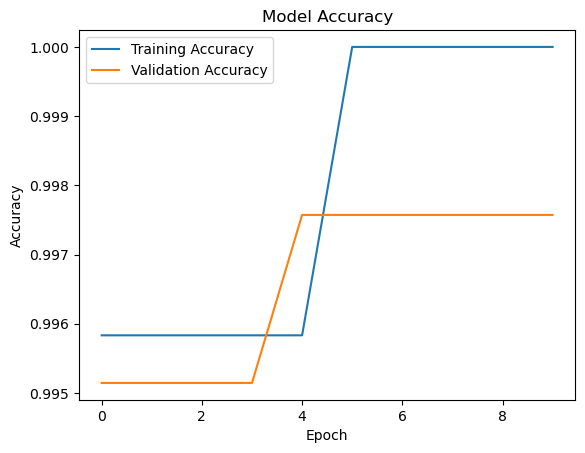

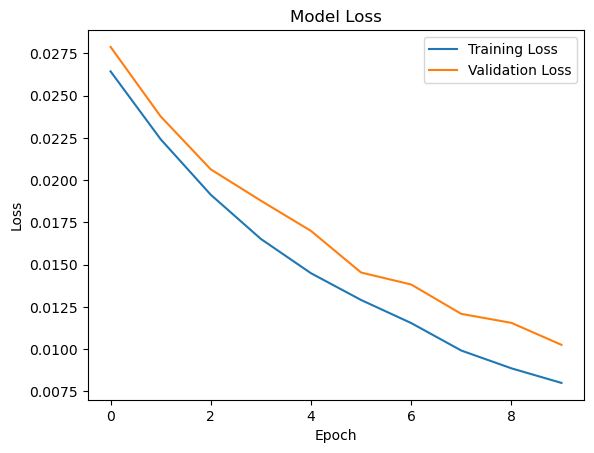

In [61]:
import matplotlib.pyplot as plt


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plotting accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [62]:
##Graph suggests the model is learning from the training data as accuracy in trianing and validation data is increasing while the loss is decreasing

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
## Use of numerous decision trees will be valuable for classification task in which accuracy is crucial

In [65]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
rfc_preds = rfc.predict(X_test)

In [67]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       228
           1       0.97      0.99      0.98       184

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

